### 2. 基于pytorch的神经网络

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.iloc[:100,:4].values
y = df.iloc[:100,4].values

In [4]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

In [5]:
label_dict = {'Setosa':0,'Versicolor':1}

In [6]:
y = np.array([label_dict[i] for i in y])

In [7]:

input_size = 4
hidden_size = 5
output_size = 1
num_epochs = 300
learning_rate = 0.1

In [8]:
w1 = torch.randn([input_size,hidden_size],requires_grad=True)
b1 = torch.randn([hidden_size,1],requires_grad=True)
w2 = torch.randn([hidden_size,output_size],requires_grad=True)
b2 = torch.randn([output_size,1],requires_grad=True)

In [9]:
def model(x):
    hidden_layer =  torch.matmul(x,w1)
    active = torch.relu(hidden_layer)
    output_layer = torch.matmul(active,w2)
    output = torch.sigmoid(output_layer)
    return output

In [10]:
criterion = nn.BCELoss()  
optimizer = torch.optim.SGD([w1,b1,w2,b2], lr=learning_rate)  

In [11]:
loss_list = []

for epoch in range(num_epochs):

    inputs = torch.tensor(X_std,dtype=torch.float)
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float)
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    loss_list.append(loss.tolist())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [50/300], Loss: 0.1767
Epoch [100/300], Loss: 0.0944
Epoch [150/300], Loss: 0.0587
Epoch [200/300], Loss: 0.0443
Epoch [250/300], Loss: 0.0367
Epoch [300/300], Loss: 0.0263


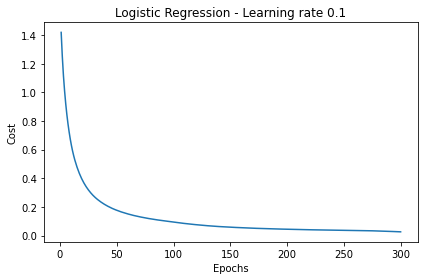

In [13]:

plt.plot(range(1, len(loss_list) + 1), loss_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.1')

plt.tight_layout()

In [14]:

input_size = 4
hidden_size = 5
output_size = 1
num_epochs = 300
learning_rate = 0.1

In [15]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return torch.sigmoid(out)

model = NeuralNet(input_size, hidden_size, output_size)


In [16]:
criterion = nn.BCELoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [17]:

for epoch in range(num_epochs):

    inputs = torch.tensor(X_std,dtype=torch.float)
    targets = torch.tensor(y.reshape(-1,1),dtype=torch.float)
    outputs = model(inputs)

    loss = criterion(outputs, targets)
    

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [50/300], Loss: 0.3728
Epoch [100/300], Loss: 0.1952
Epoch [150/300], Loss: 0.1127
Epoch [200/300], Loss: 0.0617
Epoch [250/300], Loss: 0.0333
Epoch [300/300], Loss: 0.0200


In [18]:
import pandas as pd
df = pd.read_csv('../data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

In [20]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X_std[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
X_std[:,3] = (X[:,3] - X[:,3].mean()) / X[:,3].std()

In [21]:
label_dict = {'Setosa':0,'Versicolor':1,'Virginica':2}

In [22]:
y = np.array([label_dict[i] for i in y])

In [23]:

input_size = 4
hidden_size = 5
output_size = 3
num_epochs = 300
learning_rate = 0.1

In [24]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, output_size)


In [25]:
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [26]:

for epoch in range(num_epochs):

    inputs = torch.tensor(X_std,dtype=torch.float)
    targets = torch.tensor(y,dtype=torch.long)
    outputs = model(inputs)

    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 50 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [50/300], Loss: 0.4655
Epoch [100/300], Loss: 0.3180
Epoch [150/300], Loss: 0.2454
Epoch [200/300], Loss: 0.1957
Epoch [250/300], Loss: 0.1587
Epoch [300/300], Loss: 0.1316
